# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [22]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install ipywidgets
!pip install -U smdebug
!pip install -U sagemaker
!jupyter nbextension enable --py widgetsnbextension


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

optional arguments:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        

In [2]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
from urllib.request import urlretrieve
import zipfile
import os 
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
url = r"https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip"
file_to_save = "dogImages.zip"
urlretrieve(url , file_to_save)
with zipfile.ZipFile(file_to_save , mode="r") as file:
    file.extractall(".")

In [3]:
cwd = os.getcwd()
for file in os.listdir("dogImages/"):
    print(f"num of files  in  {file} is {len(os.listdir(os.path.join(cwd , 'dogImages' , file)))} files")

num of files  in  test is 133 files
num of files  in  valid is 133 files
num of files  in  train is 133 files


In [5]:
train_dic = os.path.join(cwd , "dogImages" , "train")
valid_dic = os.path.join(cwd , "dogImages" , "valid")
test_dic = os.path.join(cwd , "dogImages" , "test")
all_dics = [train_dic , valid_dic , test_dic]
print(f"number of breed is {len(os.listdir(train_dic))} breeds")
for name , path in zip(["train" , "valid" , "test"] , all_dics):
    print(f"accoeding to {name} files :")
    for folder in os.listdir(path):
        print(f"{folder} breed there are {len(os.listdir(os.path.join(path , folder)))}")
    print("-------"*20)

number of breed is 133 breeds
accoeding to train files :
114.Otterhound breed there are 35
110.Norwegian_lundehund breed there are 33
127.Silky_terrier breed there are 41
091.Japanese_chin breed there are 57
095.Kuvasz breed there are 49
061.English_cocker_spaniel breed there are 61
043.Canaan_dog breed there are 50
131.Wirehaired_pointing_griffon breed there are 30
124.Poodle breed there are 50
087.Irish_terrier breed there are 66
053.Cocker_spaniel breed there are 47
064.English_toy_spaniel breed there are 39
105.Neapolitan_mastiff breed there are 31
032.Boston_terrier breed there are 65
017.Bearded_collie breed there are 62
094.Komondor breed there are 44
003.Airedale_terrier breed there are 52
084.Icelandic_sheepdog breed there are 50
122.Pointer breed there are 32
098.Leonberger breed there are 46
125.Portuguese_water_dog breed there are 34
009.American_water_spaniel breed there are 34
058.Dandie_dinmont_terrier breed there are 50
115.Papillon breed there are 63
006.American_eskim

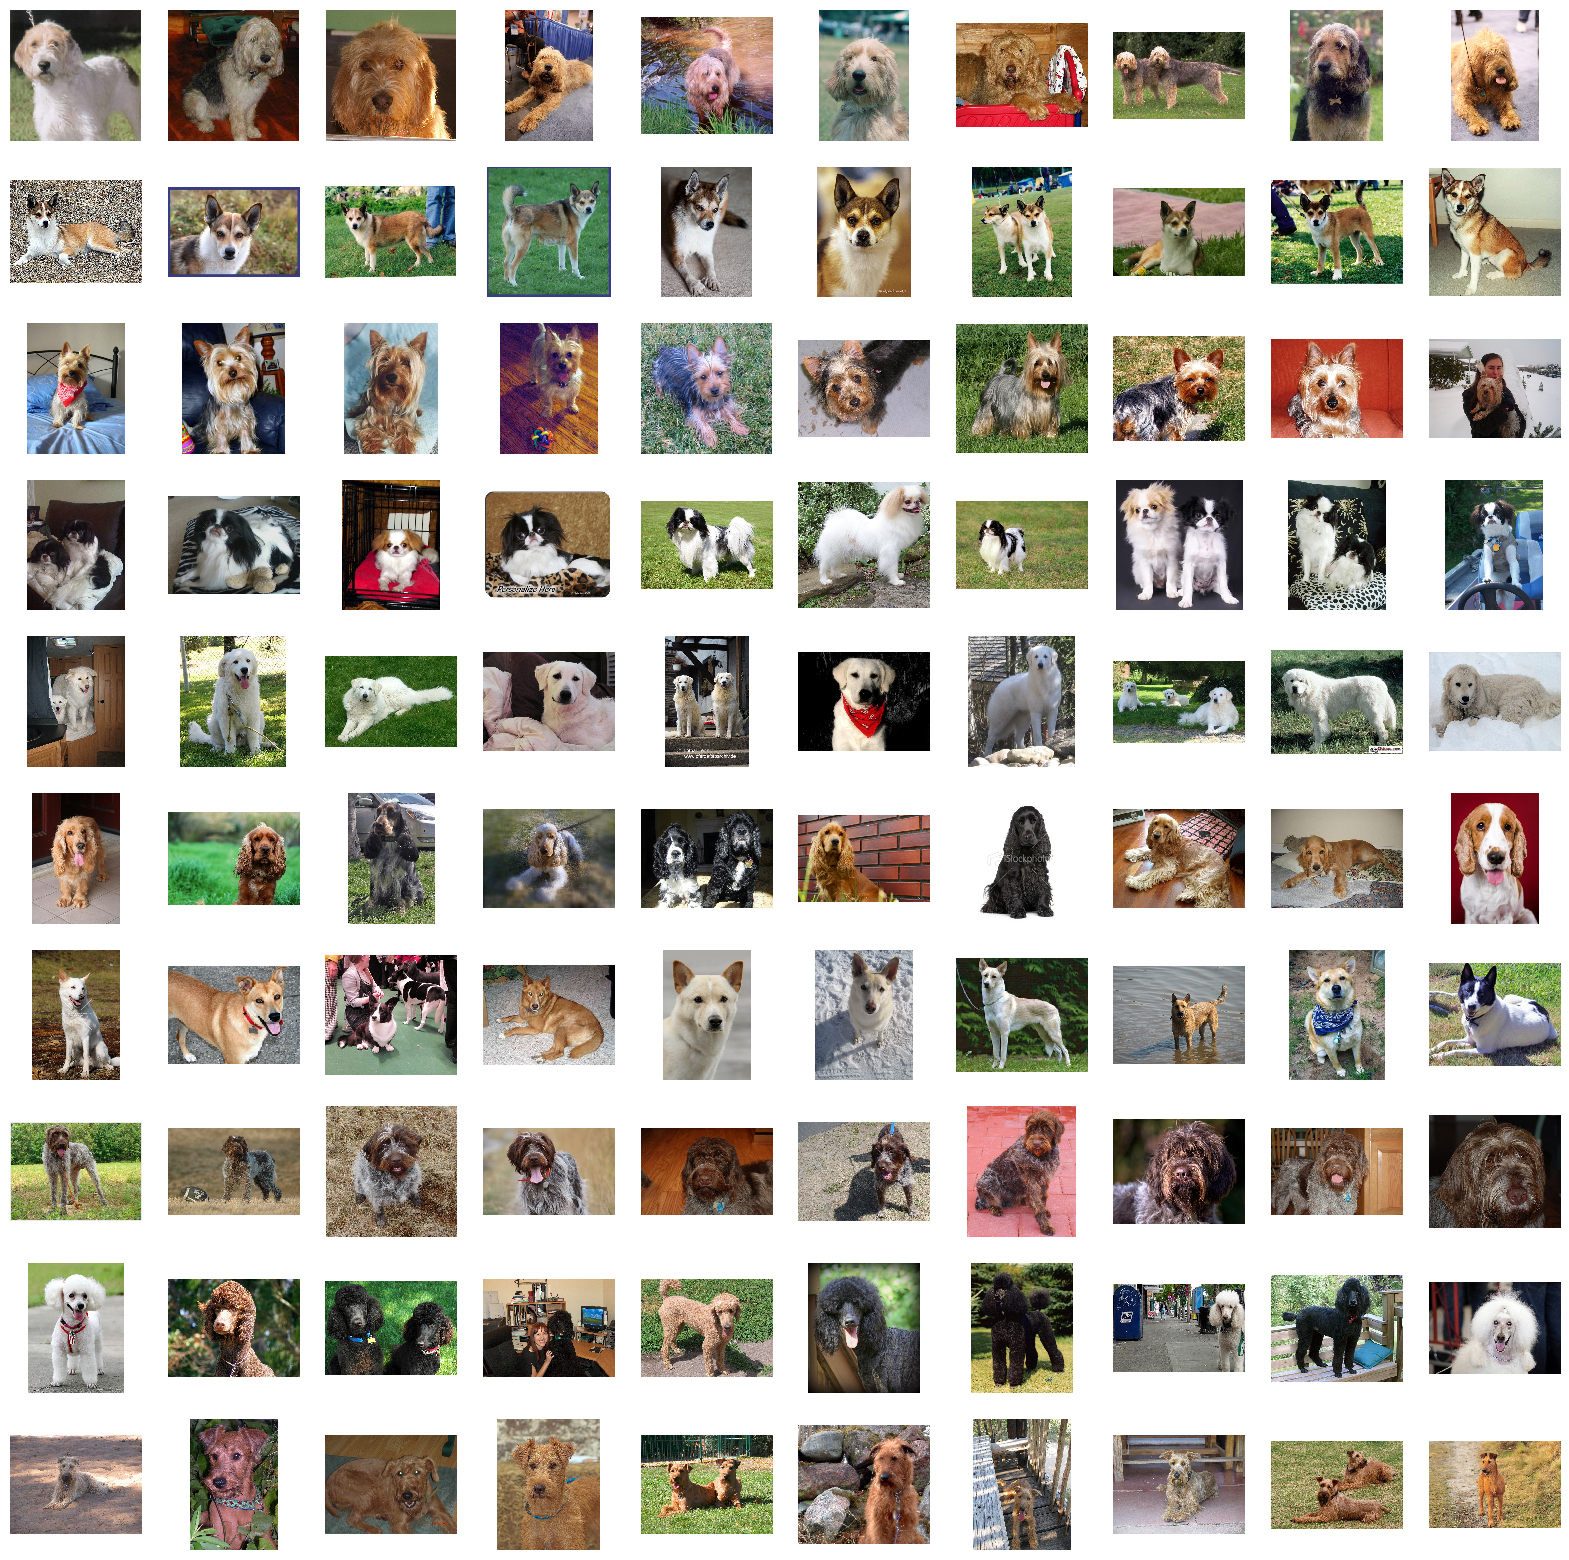

In [10]:
#let's visulaize some of this data 
%matplotlib inline
R , C = 10 , 10
fig , axes = plt.subplots(R , C , figsize=(20 , 20))
for breed , plot_row in zip(os.listdir(train_dic) ,axes) :
    dirs =[os.path.join(train_dic, breed, file) for file in os.listdir(os.path.join(train_dic , breed))][:10]
    for plot ,di in zip(plot_row , dirs ):
        image = plt.imread(di)
        plot.imshow(image)
        plot.axis("off")
        plot.grid(False)

In [4]:
#uploada all data to s3 bucket
sess = sagemaker.Session()
bucket = sess.default_bucket()
prefix = "DataSet"
s3 = boto3.resource("s3")

In [14]:
os.listdir()

['dogImages',
 'train_and_deploy.ipynb',
 '.git',
 '.ipynb_checkpoints',
 'hpo.py',
 'dogImages.zip',
 'LICENSE.txt',
 '.github',
 'CODEOWNERS',
 'train_model.py',
 'README.md']

In [31]:
os.environ['DEFAULT_S3_BUCKET']=bucket
print(os.environ["DEFAULT_S3_BUCKET"])

sagemaker-us-east-1-129011991176


In [20]:
!aws s3 sync ./dogImages/ s3://${DEFAULT_S3_BUCKET}/DataSet/

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-us-east-1-129011991176/DataSet/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg to s3://sagemaker-us-east-1-129011991176/DataSet/test/002.Afghan_hound/Afghan_hound_00116.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-us-east-1-129011991176/DataSet/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg to s3://sagemaker-us-east-1-129011991176/DataSet/test/001.Affenpinscher/Affenpinscher_00071.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg to s3://sagemaker-us-east-1-129011991176/DataSet/test/001.Affenpinscher/Affenpinscher_00047.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg to s3://sagemaker-us-east-1-129011991176/DataSet/test/001.Affenpinscher/Affenpinscher_00058.jpg
upload: dogImages/test/001.Affenpinsch

In [5]:
s3 =boto3.client("s3")
response = s3.list_buckets()
print('Existing buckets:')
for bucket in response['Buckets']:
    print(f'  {bucket["Name"]}')

Existing buckets:
  sagemaker-studio-vbxvxgx98yn
  sagemaker-us-east-1-129011991176


In [25]:
bucket = s3.Bucket(bucket)
for obj in bucket.objects.all():
    key = obj.key
    print(key)

DataSet/test/001.Affenpinscher/Affenpinscher_00003.jpg
DataSet/test/001.Affenpinscher/Affenpinscher_00023.jpg
DataSet/test/001.Affenpinscher/Affenpinscher_00036.jpg
DataSet/test/001.Affenpinscher/Affenpinscher_00047.jpg
DataSet/test/001.Affenpinscher/Affenpinscher_00048.jpg
DataSet/test/001.Affenpinscher/Affenpinscher_00058.jpg
DataSet/test/001.Affenpinscher/Affenpinscher_00071.jpg
DataSet/test/001.Affenpinscher/Affenpinscher_00078.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00116.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00125.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00139.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00141.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00143.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00146.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00149.jpg
DataSet/test/002.Afghan_hound/Afghan_hound_00151.jpg
DataSet/test/003.Airedale_terrier/Airedale_terrier_00166.jpg
DataSet/test/003.Airedale_terrier/Airedale_terrier_00175.jpg
DataSet/test/0

torch.Size([3, 600, 600])


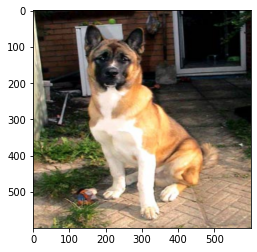

In [17]:
sample = r"/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/dogImages/train/004.Akita/Akita_00225.jpg"
import cv2
image = cv2.imread(sample)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (600 ,600))
plt.imshow(image)
print(torch.Tensor(image).float().permute(2 ,0 ,1).shape)

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [3]:
sess = sagemaker.Session()
bucket = sess.default_bucket()
prefix = "DataSet"
s3_train = f"s3://{bucket}/{prefix}/train"
s3_valid = f"s3://{bucket}/{prefix}/valid"

In [4]:
#TODO: Declare your HP ranges, metrics etc.
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([16, 32, 64]),
}
objective_metric_name = "Valid:acc"
objective_type = "Maximize"
metric_definitions = [{"Name": "Valid:acc", "Regex": "Valid:acc = ([0-9\\.]+)"}]

In [5]:
from sagemaker.inputs import TrainingInput
data = {"train":TrainingInput(s3_train , 'ShardedByS3Key') , "valid":TrainingInput(s3_valid , 'ShardedByS3Key')}

In [7]:
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
role = get_execution_role()

In [8]:
#TODO: Create estimators for your HPs
estimator = PyTorch(entry_point="hpo.py",
                    role=get_execution_role(),
                    instance_count=1,
                    instance_type="ml.m5.xlarge",
                    framework_version="1.9",
                    py_version="py38" )

tuner = HyperparameterTuner(estimator,
                        objective_metric_name,
                        hyperparameter_ranges,
                        metric_definitions,
                        max_jobs=4,
                        max_parallel_jobs=4,
                        objective_type=objective_type,
                        
)
tuner.fit(data,wait=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


....................................................................................................................................................................................................................................................................................................!


In [9]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-10-31 13:45:24 Starting - Preparing the instances for training
2022-10-31 13:45:24 Downloading - Downloading input data
2022-10-31 13:45:24 Training - Training image download completed. Training in progress.
2022-10-31 13:45:24 Uploading - Uploading generated training model
2022-10-31 13:45:24 Completed - Resource retained for reuse


{'_tuning_objective_metric': '"Valid:acc"',
 'batch-size': '"16"',
 'lr': '0.00899693582951801',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-10-31-13-22-18-513"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-13-22-18-513/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [10]:
from sagemaker.debugger import (Rule , 
                                rule_configs , 
                                ProfilerConfig ,
                                ProfilerRule ,
                                DebuggerHookConfig ,
                                FrameworkProfile ,
                               )

In [11]:
rules = [Rule.sagemaker(rule_configs.vanishing_gradient()),
         Rule.sagemaker(rule_configs.overfit()),
         Rule.sagemaker(rule_configs.overtraining()),
         Rule.sagemaker(rule_configs.poor_weight_initialization()),
         Rule.sagemaker(rule_configs.class_imbalance()),
         ProfilerRule.sagemaker(rule_configs.CPUBottleneck()),
         ProfilerRule.sagemaker(rule_configs.ProfilerReport())]
profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)
hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

In [ ]:
# TODO: Create and fit an estimator

estimator  = PyTorch(entry_point="train_model.py",
                    role=get_execution_role(),
                    instance_count=1,
                    instance_type="ml.m5.xlarge",
                    framework_version="1.9",
                    py_version="py38" ,
                    ules=rules,
                    debugger_hook_config=hook_config ,
                    profiler_config=profiler_config)
estimator.fit(data,wait=True)


2022-10-31 15:49:22 Starting - Starting the training job...
2022-10-31 15:49:49 Starting - Preparing the instances for trainingProfilerReport-1667231362: InProgress
.........
2022-10-31 15:51:09 Downloading - Downloading input data...........bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-10-31 15:52:58,872 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-10-31 15:52:58,874 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-31 15:52:58,888 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-10-31 15:52:58,896 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-10-31 15:52:59,407 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-31 15:52:59,422 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus install

In [24]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

In [25]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-10-31 17:11:42.496 pytorch-1-12-cpu-py38-ml-t3-medium-f8be1a063b37f44eb7b009d8cbea:1005 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/debug-output


In [38]:
trial.tensor("CrossEntropyLoss_output_0")

In [40]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

2022-10-31 16:53:35     363409 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-report.html
2022-10-31 16:53:35     209446 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-report.ipynb
2022-10-31 16:53:30        192 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/BatchSize.json
2022-10-31 16:53:30        200 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/CPUBottleneck.json
2022-10-31 16:53:30       1959 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/Dataloader.json
2022-10-31 16:53:30        127 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-10-31 16:53:30        199 pytorch-training-2022-10-31-1

In [41]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/BatchSize.json to ProfilerReport-1667231362/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/IOBottleneck.json to ProfilerReport-1667231362/profiler-output/profiler-reports/IOBottleneck.json
download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport-1667231362/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport-1667231362/profiler-output/pr

In [42]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [43]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

no error happen in this case 

In [33]:
# TODO: Display the profiler output
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
region= sess.boto_region_name
tj = TrainingJob(job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-129011991176/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }'}}
s3 path:s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/profiler-output


Profiler data from system is available


In [34]:
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

[2022-10-31 17:13:18.911 pytorch-1-12-cpu-py38-ml-t3-medium-f8be1a063b37f44eb7b009d8cbea:1005 INFO metrics_reader_base.py:134] Getting 63 event files
select events:['total']
select dimensions:['CPU', 'GPU']
filtered_events:{'total'}
filtered_dimensions:{'CPUUtilization-nodeid:algo-1'}


In [44]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output


In [45]:
! aws s3 ls {rule_output_path} --recursive

2022-10-31 16:53:35     363409 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-report.html
2022-10-31 16:53:35     209446 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-report.ipynb
2022-10-31 16:53:30        192 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/BatchSize.json
2022-10-31 16:53:30        200 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/CPUBottleneck.json
2022-10-31 16:53:30       1959 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/Dataloader.json
2022-10-31 16:53:30        127 pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-10-31 16:53:30        199 pytorch-training-2022-10-31-1

In [46]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport-1667231362/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/BatchSize.json to ProfilerReport-1667231362/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/IOBottleneck.json to ProfilerReport-1667231362/profiler-output/profiler-reports/IOBottleneck.json
download: s3://sagemaker-us-east-1-129011991176/pytorch-training-2022-10-31-15-49-21-341/rule-output/ProfilerReport-1667231362/profiler-output/profiler-reports/MaxInitializationTime.json to ProfilerReport-1667231362/profiler-outpu

In [47]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]
profiler_report_name

'ProfilerReport-1667231362'

In [48]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [ ]:
# TODO: Deploy your model to an endpoint

In [110]:
predictor = estimator.deploy(initial_instance_count= 1 ,
                            instance_type='ml.m4.xlarge' , endpoint_name="dog-breed-classifier")

-------!

In [112]:
from sagemaker.serializers import NumpySerializer
from sagemaker.deserializers import NumpyDeserializer
predictor.serializers = NumpySerializer()
predictor.deserializers = NumpyDeserializer()

In [115]:
# TODO: Run an prediction on the endpoint
# TODO: Your code to load and preprocess image to send to endpoint for prediction
sample = r"/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/dogImages/train/004.Akita/Akita_00225.jpg"
import cv2
import torch
image = cv2.imread(sample)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (600 ,600))
#plt.imshow(image)
image = torch.Tensor(image).float().permute(2 ,0 ,1)/255.0
response = predictor.predict(image.cpu().numpy())
print(response.argmax())

3


In [116]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()